In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols = ['A1','A2','B1','B2','C1','C2']
haps = pd.read_csv('../../data/haplotypes/top_1000_haplotypes.txt',names=cols)

In [3]:
allele_mapper = lambda allele: f"HLA-{allele[0]}{allele[1:3]}{allele[4:]}"

In [4]:
for col in cols:
    haps[col] = haps[col].apply(allele_mapper)

In [5]:
# netMHC 4.0 only works for a subset of alleles -- only use those rather than relying on netMHCPan for predictions
netMHC_allow_list = pd.read_table('/data/lareauc/levinej/pep/peptidome/code/maxent/data/MHC_allele_names.txt',
                                names=['allele','allele-alt','locus'])

In [6]:
allowed_alleles = set(netMHC_allow_list['allele'])

In [7]:
haps["all_allowed"] = haps.apply(
        lambda row: all(row[col] in allowed_alleles for col in cols), axis=1
    )

In [8]:
allowed_haps = haps[haps["all_allowed"]]

In [9]:
top_500_allowed_haps = allowed_haps.head(500)[cols]

In [10]:
top_500_allowed_haps

,A1,A2,B1,B2,C1,C2
0,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B0801,HLA-C0701,HLA-C0702
1,HLA-A0201,HLA-A0301,HLA-B0702,HLA-B0801,HLA-C0701,HLA-C0702
2,HLA-A0201,HLA-A0201,HLA-B0702,HLA-B0801,HLA-C0701,HLA-C0702
3,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B4402,HLA-C0701,HLA-C0702
4,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B0801,HLA-C0401,HLA-C0701
...,...,...,...,...,...,...
557,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B4402,HLA-C0701,HLA-C0802
559,HLA-A0201,HLA-A0201,HLA-B0702,HLA-B4001,HLA-C0501,HLA-C0702
560,HLA-A0201,HLA-A0301,HLA-B0801,HLA-B4001,HLA-C0602,HLA-C0701
561,HLA-A0101,HLA-A0201,HLA-B1501,HLA-B4402,HLA-C0501,HLA-C0702


In [11]:
top_500_allowed_haps.to_csv('/data/lareauc/levinej/pep/peptidome/code/maxent/data/top_500_allowed_haplotypes.csv')

In [12]:
a_alleles = list(set(top_500_allowed_haps['A1']).union(set(top_500_allowed_haps['A2'])))
a_alleles

['HLA-A2402', 'HLA-A1101', 'HLA-A0201', 'HLA-A0301', 'HLA-A0101']

In [13]:
b_alleles = list(set(top_500_allowed_haps['B1']).union(set(top_500_allowed_haps['B2'])))
b_alleles

['HLA-B2705',
 'HLA-B5701',
 'HLA-B5101',
 'HLA-B4402',
 'HLA-B1801',
 'HLA-B3501',
 'HLA-B0702',
 'HLA-B1501',
 'HLA-B0801',
 'HLA-B4403',
 'HLA-B4001',
 'HLA-B1402']

In [14]:
c_alleles = list(set(top_500_allowed_haps['C1']).union(set(top_500_allowed_haps['C2'])))
c_alleles

['HLA-C1203',
 'HLA-C0303',
 'HLA-C0702',
 'HLA-C0501',
 'HLA-C0602',
 'HLA-C0802',
 'HLA-C0701',
 'HLA-C0401']

In [15]:
for i, allele_list in enumerate([a_alleles,b_alleles,c_alleles]):
    with open(f"/data/lareauc/levinej/pep/peptidome/code/maxent/mhc_top_500_haplotypes_alleles_{i+1}.txt","w") as f:
        for alle in allele_list:
            f.write(alle)
            f.write("\n")

In [16]:
##

In [17]:
cols = ['original_idx','A1','A2','B1','B2','C1','C2']
top_500_allowed_haps = pd.read_csv('/data/lareauc/levinej/pep/peptidome/code/maxent/data/top_500_allowed_haplotypes.csv',skiprows=1,names=cols)

In [18]:
top_500_allowed_haps

,original_idx,A1,A2,B1,B2,C1,C2
0,0,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B0801,HLA-C0701,HLA-C0702
1,1,HLA-A0201,HLA-A0301,HLA-B0702,HLA-B0801,HLA-C0701,HLA-C0702
2,2,HLA-A0201,HLA-A0201,HLA-B0702,HLA-B0801,HLA-C0701,HLA-C0702
3,3,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B4402,HLA-C0701,HLA-C0702
4,4,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B0801,HLA-C0401,HLA-C0701
...,...,...,...,...,...,...,...
495,557,HLA-A0101,HLA-A0201,HLA-B0702,HLA-B4402,HLA-C0701,HLA-C0802
496,559,HLA-A0201,HLA-A0201,HLA-B0702,HLA-B4001,HLA-C0501,HLA-C0702
497,560,HLA-A0201,HLA-A0301,HLA-B0801,HLA-B4001,HLA-C0602,HLA-C0701
498,561,HLA-A0101,HLA-A0201,HLA-B1501,HLA-B4402,HLA-C0501,HLA-C0702


In [19]:
hap_probs = np.load('../../data/haplotypes/unique_sorted_haplotype_probs_only.npy')
hap_probs

array([1.23251758e-04, 1.04756506e-04, 1.03146596e-04, ...,
       1.00582020e-24, 1.00582020e-24, 1.00582020e-24])

In [20]:
top_500_probs = hap_probs[top_500_allowed_haps['original_idx']]

In [21]:
top_haplotype = top_500_allowed_haps.loc[0][['A1','A2','B1','B2','C1','C2']].values
top_haplotype = [f"{x[:5]}*{x[5:7]}:{x[7:]}" for x in top_haplotype]
top_haplotype = ";".join(top_haplotype)
top_haplotype

'HLA-A*01:01;HLA-A*02:01;HLA-B*07:02;HLA-B*08:01;HLA-C*07:01;HLA-C*07:02'

Text(0, 0.5, 'Log10 Probability')

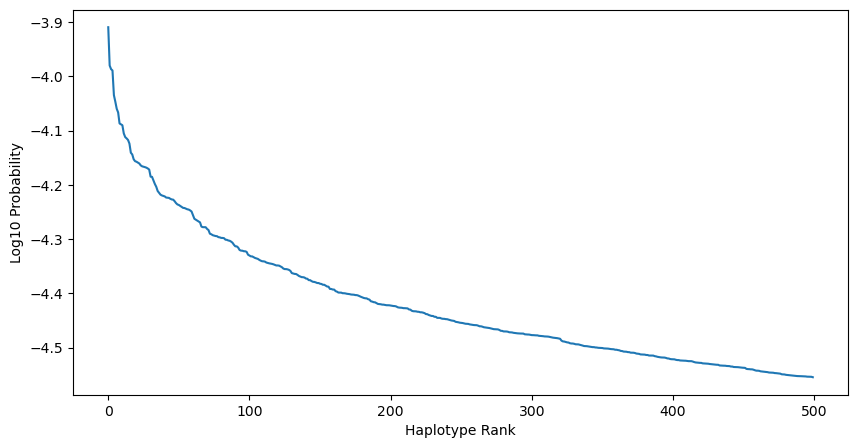

In [22]:
plt.figure(figsize=(10,5))
plt.plot(range(500),np.log10(top_500_probs))
plt.xlabel('Haplotype Rank')
plt.ylabel('Log10 Probability')
# plt.annotate(f"Top Haplotype: \n {top_haplotype}", xy=(0,-3.91),xytext=(15,-4.0), arrowprops=dict(arrowstyle= '->',
#                          color='red',
#                          lw=3,
#                          ls='--'))

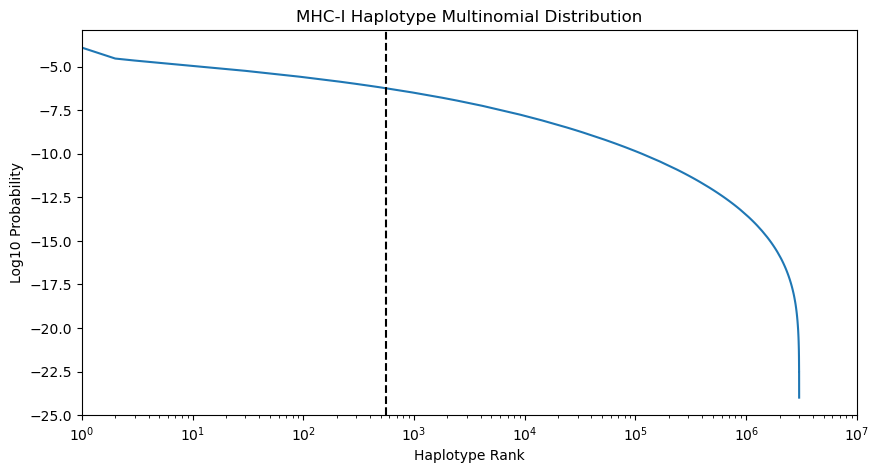

In [23]:
plt.figure(figsize=(10,5))
plt.plot(range(1,hap_probs[::500].shape[0]+1),np.log10(hap_probs[::500]))
plt.axvline(top_500_allowed_haps['original_idx'].max(),color='k',linestyle='--')
# plt.scatter([1],[np.log10(hap_probs[0])],color='black',s=100)
plt.xlabel('Haplotype Rank')
plt.ylabel('Log10 Probability')
plt.title('MHC-I Haplotype Multinomial Distribution')
plt.xscale('log')
plt.xlim([1,10**7])
plt.savefig('plots/haplotypes.png')

np.float64(0.00012325175794439)

KeyboardInterrupt: 

In [27]:
hap_plot_df = pd.DataFrame()
hap_plot_df['Rank'] = range(1,hap_probs[::500].shape[0]+1)
hap_plot_df['logp'] = np.log10(hap_probs[::500])

In [28]:
hap_plot_df.to_csv('../../figures/New Paper Figures/Figure Data/hap_probs.csv')

In [29]:
top_500_allowed_haps['original_idx'].max()

np.int64(563)